### Visualizing dataset for presentation purposes

In [1]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = Path("data/sat1/split_stage_data.nc")
data = xr.load_dataset(data_path)

In [5]:
data

<xarray.Dataset>
Dimensions:      (channels: 30, samples: 157, epochs: 200, participant: 25,
                  labels: 4)
Coordinates:
  * channels     (channels) object 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 7 ... 150 151 152 153 154 155 156
  * epochs       (epochs) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
  * participant  (participant) object '0001' '0002' '0003' ... '0024' '0025'
  * labels       (labels) object 'confirmation' 'decision' 'encoding' 'response'
    stim         (participant, epochs) float64 nan 1.0 1.0 1.0 ... 2.0 nan 2.0
    resp         (participant, epochs) object '' 'resp_left' ... '' 'resp_left'
    rt           (participant, epochs) float64 nan 0.683 1.068 ... nan 1.02
    cue          (participant, epochs) object '' 'SP' 'AC' 'SP' ... 'SP' '' 'AC'
    movement     (participant, epochs) object '' 'stim_left' ... '' 'stim_right'
    trigger      (participant, epochs) object '' ... 'AC/stim_right/resp_left'
Data variables:
    data         (participant, epochs, labels, channels, samples) float64 nan...

### Which plots would be useful?
- For each condition(cu)
    - Plot of avg not-NaN sample length
- For each participant
    - Plot of avg not-NaN sample length

In [89]:
data.sel(participant="0021", channels="Fp1", epochs=0).data

<xarray.DataArray 'data' (labels: 4, samples: 157)>
array([[-11.95652103, -11.66712856, -16.60264206, -12.8394289 ,
         -6.12484169,  -5.29754734,  -4.22220325,  -5.32257748,
         -6.30005026,  -5.65012074,  -5.61978436,  -4.06413412,
         -6.74995422, -13.03981876, -13.00213528,  -9.78717136,
         -7.76501513,  -4.36741066,  -3.86855841,  -3.96473646,
          0.38768536,  -0.46019372,  -5.48295164,  -7.29868031,
         -8.10804272,  -5.44400549,  -2.07789779,  -2.69890881,
         -3.05435443,  -1.92624545,  -0.14473617,   0.37756139,
         -2.76270151,  -7.17918777,  -5.1225543 ,   3.04851437,
          3.38843966,  -2.50560665,  -3.44783115,  -1.60542727,
          2.50471473,   4.25936651,  -1.33009636,  -4.54194355,
         -2.03007698,   1.2822721 ,   2.56001353,   0.6586417 ,
         -1.30218017,  -2.96084929,  -4.29793453,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
...
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan]])
Coordinates:
    channels     <U3 'Fp1'
  * samples      (samples) int64 0 1 2 3 4 5 6 7 ... 150 151 152 153 154 155 156
    epochs       int64 0
    participant  <U4 '0021'
  * labels       (labels) object 'confirmation' 'decision' 'encoding' 'response'
    stim         float64 2.0
    resp         object 'resp_right'
    rt           float64 1.388
    cue          object 'AC'
    movement     object 'stim_right'
    trigger      object 'AC/stim_right/resp_right'

In [49]:
acc_data = data.where(data.cue == "AC", drop=True)
sp_data = data.where(data.cue == "SP", drop=True)

In [50]:
avg_acc = (
    acc_data.sel(channels="Fp1").data.isnull().idxmax("samples").mean(dim="epochs")
)
avg_sp = sp_data.sel(channels="Fp1").data.isnull().idxmax("samples").mean(dim="epochs")

In [25]:
avg_length = data.sel(channels="Fp1").data.isnull().idxmax("samples").mean(dim="epochs")
avg_length

<xarray.DataArray 'samples' (participant: 25, labels: 4)>
array([[ 8.72 , 15.995, 25.62 , 16.48 ],
       [ 7.55 , 12.165, 22.345, 12.76 ],
       [ 8.78 , 12.425, 23.07 , 18.005],
       [ 7.58 , 17.205, 22.375, 13.635],
       [ 6.79 , 11.345, 20.81 ,  8.16 ],
       [11.765, 18.59 , 21.93 , 19.3  ],
       [ 9.66 , 12.13 , 20.725, 16.09 ],
       [ 8.735, 21.83 , 23.57 , 17.665],
       [ 9.05 , 15.795, 24.75 , 17.885],
       [ 9.005, 14.85 , 28.81 , 24.625],
       [ 9.77 , 20.55 , 25.07 , 15.835],
       [ 9.415, 12.685, 19.865, 15.325],
       [14.28 , 27.67 , 29.06 , 31.155],
       [ 8.17 , 12.29 , 22.03 , 10.355],
       [ 9.76 , 13.805, 27.325, 20.38 ],
       [ 9.98 , 12.36 , 26.76 , 21.03 ],
       [ 8.375, 16.775, 22.23 , 12.1  ],
       [10.77 , 13.62 , 23.58 , 19.335],
       [ 9.65 , 15.04 , 20.015, 24.025],
       [ 8.115,  8.85 , 19.985, 12.06 ],
       [ 7.205, 15.325, 20.7  , 14.27 ],
       [ 8.875, 13.17 , 24.655, 23.635],
       [ 9.34 , 14.29 , 23.98 , 13.21 ],
       [ 7.815, 10.66 , 16.665, 11.66 ],
       [ 9.69 , 16.645, 18.51 , 15.4  ]])
Coordinates:
    channels     <U3 'Fp1'
  * participant  (participant) object '0001' '0002' '0003' ... '0024' '0025'
  * labels       (labels) object 'confirmation' 'decision' 'encoding' 'response'

In [12]:
avg_length.labels.to_numpy()

array(['confirmation', 'decision', 'encoding', 'response'], dtype=object)

AttributeError: Axes.set() got an unexpected keyword argument 'rotation'

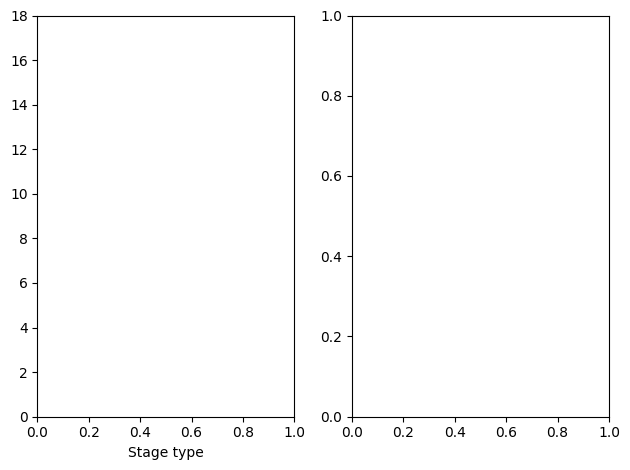

In [75]:
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

plt.setp(axes, ylim=(0, 18), xlabel="Stage type")

plot1 = sns.barplot(avg_acc, ax=axes[0])
plot2 = sns.barplot(avg_sp, ax=axes[1])
# plot1.set_xticklabels(avg_length.labels.to_numpy())
plot1.set_ylabel("Duration (in samples)")
# plot1.set_xlabel("Stage")
# plot1.set_ylabel("Duration in samples")
# plot2.set_xticklabels(avg_length.labels.to_numpy())
plot2.set_yticklabels([])
# plot2.set_xlabel("Stage")
# plot2.set_ylabel("Duration in samples")

plt.show()

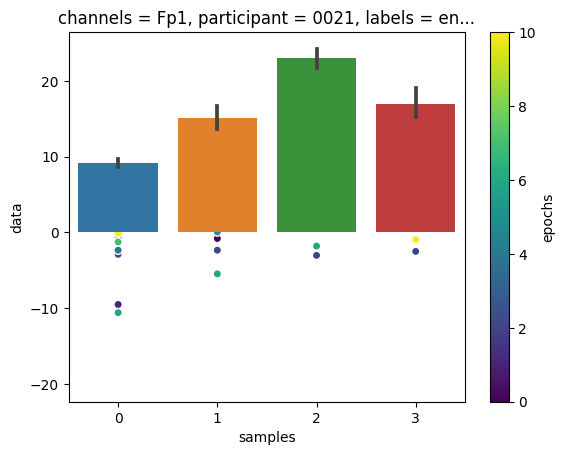

In [101]:
plt.show()

In [79]:
data_n = data.sel(
    participant="0021",
    channels="Fp1",
    labels="encoding",
    epochs=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
)

In [83]:
sns.scatterplot(data=data_n, x="samples", y="data")

ValueError: Data must be 1-dimensional, got ndarray of shape (11, 157) instead

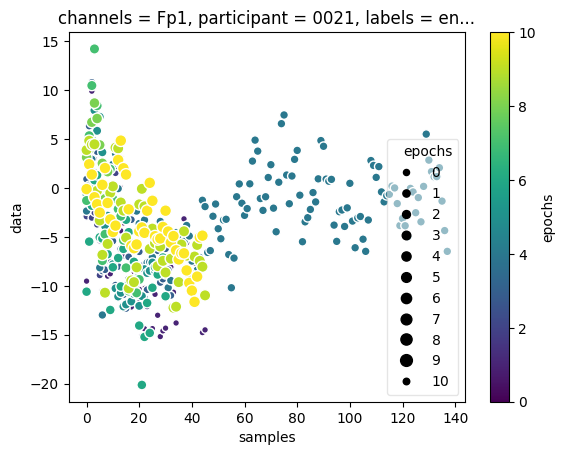

In [73]:
plt.show()

In [51]:
data.sel(participant="0021", channels="Fp1", labels="encoding", epochs=[0]).data

<xarray.DataArray 'data' (epochs: 1, samples: 157)>
array([[ -0.18200085,  -0.80526227,   1.35877502,   3.02365875,
         -0.02237152,  -2.25271702,  -2.42085075,   0.2947644 ,
         -0.91509807,  -5.1842823 ,  -1.44319379,  -0.2521725 ,
         -2.26326203,   0.07126679,  -3.59668231,  -6.76995134,
         -5.46194267,  -7.99716139,  -8.59681225,  -9.54486752,
        -11.66129684,  -9.17194557, -10.2177906 , -11.75735283,
         -8.43788433,  -7.39112139,  -6.80812454,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan]])
Coordinates:
    channels     <U3 'Fp1'
  * samples      (samples) int64 0 1 2 3 4 5 6 7 ... 150 151 152 153 154 155 156
  * epochs       (epochs) int64 0
    participant  <U4 '0021'
    labels       <U8 'encoding'
    stim         (epochs) float64 2.0
    resp         (epochs) object 'resp_right'
    rt           (epochs) float64 1.388
    cue          (epochs) object 'AC'
    movement     (epochs) object 'stim_right'
    trigger      (epochs) object 'AC/stim_right/resp_right'